In [18]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [6]:
# !ls outputs/predictions

In [10]:
base_path = "outputs/predictions/"

In [42]:
# BASELINE
df_just_guess_the_mean = pl.read_csv(base_path+"just_guess_the_mean.csv")
# JUST ASK LLAMA
df_just_ask_llama = pl.read_csv(base_path+"8b_quantized_base.csv")
# TRADITIONAL FINE TUNING
df_fine_tuned_llama = pl.read_csv(base_path+"finetuned_checkpoint650.csv")
# EMBEDDING
df_small_embed = pl.read_csv(base_path+"small_embed_predictions.csv")
df_large_embed = pl.read_csv(base_path+"large_embed_predictions.csv")
# MY METHOD
df_mymethod = pl.read_csv(base_path+"mymethod03predictions.csv")


In [43]:
df_just_guess_the_mean = df_just_guess_the_mean.with_columns(pl.col("score").alias("true"), pl.col("naive_guess").alias("predicted")).select(pl.col("true","predicted"))
MSE_just_guess_the_mean = mean_squared_error(df_just_guess_the_mean["true"].to_numpy(), df_just_guess_the_mean["predicted"].to_numpy())

df_just_ask_llama = df_just_ask_llama.with_columns(pl.col("score").alias("true"), pl.col("8b_quant_prediction").alias("predicted")).select(pl.col("true","predicted"))
MSE_just_ask_llama = mean_squared_error(df_just_ask_llama["true"].to_numpy(), df_just_ask_llama["predicted"].to_numpy())

df_fine_tuned_llama = df_fine_tuned_llama.with_columns(pl.col("score").alias("true"), pl.col("8b_quant_prediction_finetuned").alias("predicted")).select(pl.col("true","predicted"))
MSE_finetuned_llama = mean_squared_error(df_fine_tuned_llama["true"].to_numpy(), df_fine_tuned_llama["predicted"].to_numpy())

df_small_embed = df_small_embed.with_columns(pl.col("labels").alias("true"), pl.col("small_embed_predictions").alias("predicted")).select(pl.col("true","predicted"))
MSE_small_embed = mean_squared_error(df_small_embed["true"].to_numpy(), df_small_embed["predicted"].to_numpy())

df_large_embed = df_large_embed.with_columns(pl.col("labels").alias("true"), pl.col("large_embed_predictions").alias("predicted")).select(pl.col("true","predicted"))
MSE_large_embed = mean_squared_error(df_large_embed["true"].to_numpy(), df_large_embed["predicted"].to_numpy())

df_mymethod = df_mymethod.with_columns(pl.col("labels").alias("true"), pl.col("mymethod03predictions").alias("predicted")).select(pl.col("true","predicted"))
MSE_mymethod = mean_squared_error(df_mymethod["true"].to_numpy(), df_mymethod["predicted"].to_numpy())

In [51]:
labels = [
    "Just Ask Llama",
    "Fine Tune Llama",
    "Just Guess The Mean",
    "Small Embedding+NN",
    "Large Embedding+NN",
    "My Method (Hidden State+NN)",
]

MSEs = [
    MSE_just_ask_llama,
    MSE_finetuned_llama,
    MSE_just_guess_the_mean,
    MSE_small_embed,
    MSE_large_embed,
    MSE_mymethod,
]

In [52]:
MSEs

[1020.8938906752412,
 89.20900321543408,
 81.56741161797018,
 3.920820848305509,
 3.897669347050809,
 3.28160895490526]

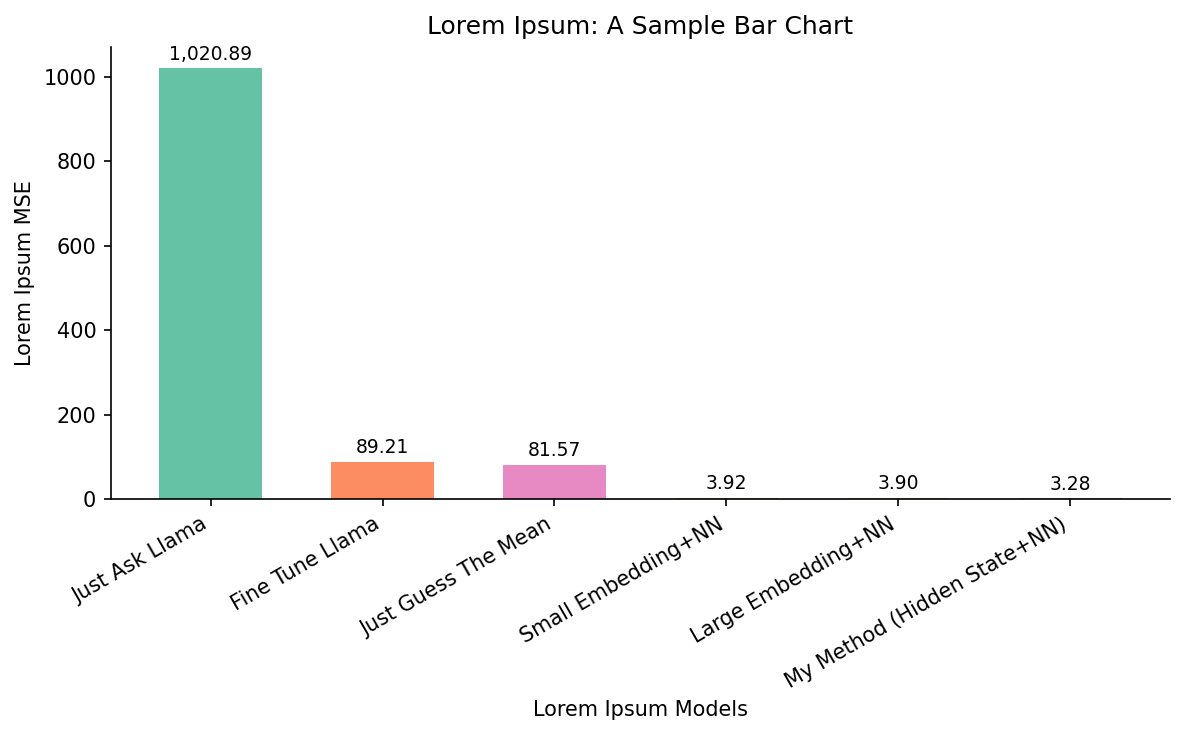

In [53]:

# Convert data to a NumPy array for convenience
MSEs = np.array(MSEs)

# Create figure and axis
plt.figure(figsize=(8, 5), dpi=150)

# Use a built-in colormap to get a clean, publication-friendly color palette
# "Set2" is often used for colorblind-safe, nice pastel colors
colors = plt.cm.Set2(np.linspace(0, 1, len(labels)))

# Create bar plot
x_positions = np.arange(len(labels))
bars = plt.bar(x_positions, MSEs, color=colors, width=0.6)

# Label each bar with its MSE value above it, formatted to 2 decimals
for x, y in zip(x_positions, MSEs):
    plt.text(
        x,
        y + 0.01 * max(MSEs),  # Slight offset above the bar
        f"{y:,.2f}",
        ha='center',
        va='bottom',
        fontsize=9
    )

# Set tick labels
plt.xticks(x_positions, labels, rotation=30, ha='right')

# Remove gridlines/visual noise
plt.grid(False)
# Optionally remove the top and right spines for a cleaner look
for spine in ['top', 'right']:
    plt.gca().spines[spine].set_visible(False)

# Add labels and a title (placeholder text)
plt.xlabel("Lorem Ipsum Models")
plt.ylabel("Lorem Ipsum MSE")
plt.title("Lorem Ipsum: A Sample Bar Chart")

plt.tight_layout()
plt.show()

In [54]:
df_just_ask_llama

true,predicted
i64,i64
9,38
8,37
9,42
9,18
12,17
…,…
36,42
35,38
36,22


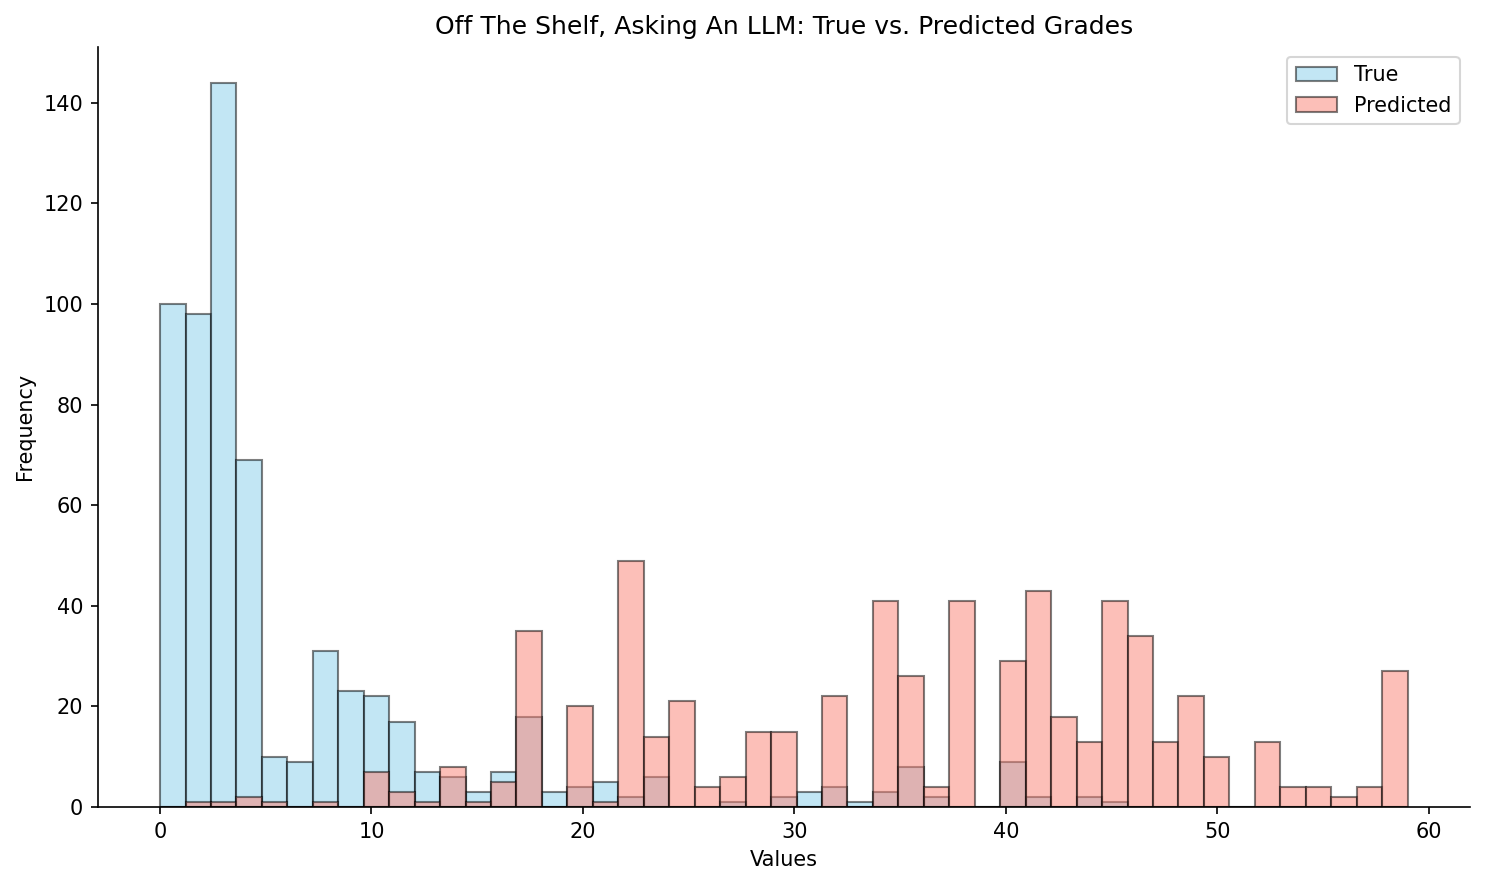

In [56]:
# Convert Polars columns to NumPy arrays for plotting
true_values = df_just_ask_llama["true"].to_numpy()
predicted_values = df_just_ask_llama["predicted"].to_numpy()

# Create the overlapping histogram
plt.figure(figsize=(10, 6), dpi=150)

# Plot histograms
bins = np.linspace(min(true_values.min(), predicted_values.min()),
                   max(true_values.max(), predicted_values.max()),
                   50)

plt.hist(true_values, bins=bins, alpha=0.5, label='True', color='skyblue', edgecolor='black')
plt.hist(predicted_values, bins=bins, alpha=0.5, label='Predicted', color='salmon', edgecolor='black')

# Add labels, legend, and title
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Off The Shelf, Asking An LLM: True vs. Predicted Grades")
plt.legend()

# Clean up plot for a publication-quality figure
plt.grid(False)
for spine in ['top', 'right']:
    plt.gca().spines[spine].set_visible(False)

plt.tight_layout()
plt.show()
